<a href="https://colab.research.google.com/github/xinging-birds/VaR-Model/blob/master/lead-lag-trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wellness Project

By Shannon Huang

2/24/2020

Project date range: 1/3/2000 - 2/21/2020


In [0]:
# Wellness Project
# by: Shannon Huang
# 2/24/2020
# Project date range: 1/4/2010 - 2/21/2020
# keep in mind, PLNT US Equity & YOGA US Equity must be tested on different time pd

## Libraries

In [0]:
# import

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time

## Import CSV

Import data from `wellness data.csv` and define lead/lag equities.



In [217]:
# read in data file

df = pd.read_csv("wellness data.csv")
df = df.iloc[::-1]  # reverses order of dates
df = df.reset_index(drop=True)
df.head()

,Dates,LULU US Equity,NKE US Equity,ADDDF US Equity,KR US Equity,CVS US Equity
0,1/1/2010,15.050,14.5403,47.5966,8.5764,26.4992
1,1/4/2010,15.455,14.3818,47.5966,8.5555,27.1327
2,1/5/2010,15.915,14.4391,47.5966,8.4553,27.0257
3,1/6/2010,16.250,14.3510,49.0624,8.4594,26.7871
4,1/7/2010,16.155,14.4919,48.7175,8.5430,27.7744


In [0]:
# create lists of lead and lag equities in reference to their index in the dataframe
lead_list = ["LULU US Equity", "NKE US Equity", "ADDDF US Equity"]
lag_list = ["KR US Equity", "CVS US Equity"]

## Moving Averages

Calculate 20-day and 100-day moving averages and append them to the dataframe.

In [0]:
# calculate 20-day moving averages for each one
for i in range(3):
    df["20_MA_" + str(i + 1)] = df.rolling(window=20)[lead_list[i]].mean()
for i in range(2):
    df["20_MA_" + str(i + 7)] = df.rolling(window=20)[lag_list[i]].mean()

In [0]:
df.head()

,Dates,LULU US Equity,NKE US Equity,ADDDF US Equity,KR US Equity,CVS US Equity,20_MA_1,20_MA_2,20_MA_3,20_MA_7,20_MA_8
0,1/1/2010,15.050,14.5403,47.5966,8.5764,26.4992,NaN,NaN,NaN,NaN,NaN
1,1/4/2010,15.455,14.3818,47.5966,8.5555,27.1327,NaN,NaN,NaN,NaN,NaN
2,1/5/2010,15.915,14.4391,47.5966,8.4553,27.0257,NaN,NaN,NaN,NaN,NaN
3,1/6/2010,16.250,14.3510,49.0624,8.4594,26.7871,NaN,NaN,NaN,NaN,NaN
4,1/7/2010,16.155,14.4919,48.7175,8.5430,27.7744,NaN,NaN,NaN,NaN,NaN


In [0]:
# calculate 100-day moving averages for each one
for i in range(3):
    df["100_MA_" + str(i + 1)] = df.rolling(window=100)[lead_list[i]].mean()
for i in range(2):
    df["100_MA_" + str(i + 7)] = df.rolling(window=100)[lag_list[i]].mean()

In [0]:
df.head()

,Dates,LULU US Equity,NKE US Equity,ADDDF US Equity,KR US Equity,CVS US Equity,20_MA_1,20_MA_2,20_MA_3,20_MA_7,20_MA_8,100_MA_1,100_MA_2,100_MA_3,100_MA_7,100_MA_8
0,1/1/2010,15.050,14.5403,47.5966,8.5764,26.4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2010,15.455,14.3818,47.5966,8.5555,27.1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/2010,15.915,14.4391,47.5966,8.4553,27.0257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/2010,16.250,14.3510,49.0624,8.4594,26.7871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/7/2010,16.155,14.4919,48.7175,8.5430,27.7744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


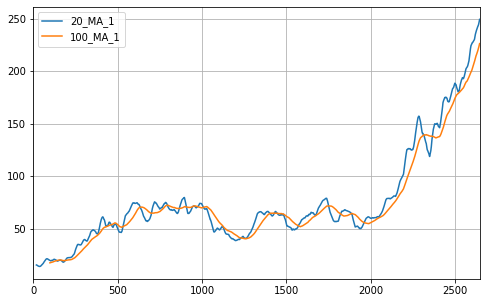

In [0]:
df[["20_MA_1","100_MA_1"]].plot(grid=True,figsize=(8,5))

## Data Split

Split data into in-sample and out-of-sample data. Split is created using pandas's `sample` function, to randomly sample 50% of rows into `df1` and the rest into `df2`.

In [0]:
np.random.seed()

In [246]:
# divide data into in-sample (df1) and out-of-sample (df2)
# len(df)/2 = 2646/2 = 1323
# df1 = df.copy()[0:1323]

df1 = df.sample(frac=0.5, random_state=2000).sort_index()
df2 = df.drop(df1.index)
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df1

,Dates,LULU US Equity,NKE US Equity,ADDDF US Equity,KR US Equity,CVS US Equity,20_MA_1,20_MA_2,20_MA_3,20_MA_7,20_MA_8,100_MA_1,100_MA_2,100_MA_3,100_MA_7,100_MA_8
0,1/1/2010,15.050,14.5403,47.5966,8.5764,26.4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/5/2010,15.915,14.4391,47.5966,8.4553,27.0257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/8/2010,16.135,14.4633,48.7175,8.4636,27.9718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/19/2010,15.835,14.2410,47.7690,8.8104,27.9307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/21/2010,15.745,14.0055,47.7690,8.9900,27.4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,2/3/2020,246.370,99.2700,314.2500,26.8295,66.9300,240.9935,101.7190,338.888540,27.975610,72.352585,217.8133,95.509195,315.118375,26.663012,69.669213
1319,2/17/2020,254.410,103.5400,314.9000,28.2300,71.3700,245.7715,101.1745,324.655595,27.904875,71.363500,223.4767,96.742364,316.675845,26.930182,70.619792
1320,2/18/2020,259.230,102.0000,306.2600,29.7100,72.0000,246.6070,101.0455,322.786095,27.977795,71.259000,224.1421,96.841966,316.672845,26.974314,70.725124
1321,2/19/2020,262.510,102.4600,316.0500,29.5400,71.7800,247.5175,100.9440,321.183595,28.044205,71.147500,224.8759,96.954047,316.876045,27.022084,70.836635


In [247]:
# df2 = df.copy()[-1323:-1]
df2

,Dates,LULU US Equity,NKE US Equity,ADDDF US Equity,KR US Equity,CVS US Equity,20_MA_1,20_MA_2,20_MA_3,20_MA_7,20_MA_8,100_MA_1,100_MA_2,100_MA_3,100_MA_7,100_MA_8
0,1/4/2010,15.455,14.3818,47.5966,8.5555,27.1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/6/2010,16.250,14.3510,49.0624,8.4594,26.7871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/7/2010,16.155,14.4919,48.7175,8.5430,27.7744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/11/2010,15.905,14.2850,49.8816,8.4970,27.9142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/12/2010,15.675,14.2652,48.6313,8.6516,27.6098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,2/11/2020,251.580,100.0200,314.4000,28.2814,73.8500,243.4255,101.2630,332.159340,27.825955,72.00532,220.9786,96.290356,316.231495,26.812873,70.192874
1319,2/12/2020,253.940,103.0000,318.0000,28.5300,73.7500,243.9480,101.2735,330.209345,27.845845,71.95455,221.5878,96.414619,316.431545,26.843425,70.313340
1320,2/13/2020,253.860,103.3700,310.6250,28.6300,72.0000,244.4555,101.2735,328.065595,27.881175,71.77754,222.2110,96.529018,316.557845,26.874879,70.426164
1321,2/14/2020,254.410,103.5400,314.9000,28.2300,71.3700,245.1135,101.2240,326.360595,27.893025,71.57052,222.8579,96.643720,316.621845,26.902728,70.527858


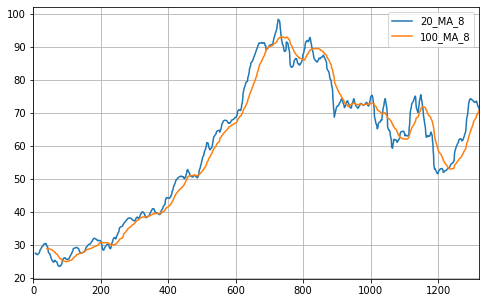

In [210]:
df1[["20_MA_8","100_MA_8"]].plot(grid=True,figsize=(8,5))

## Calculating Lead-Lag Returns

First, we create columns that indicate where crossovers occur&mdash;`True` if it occurs, `False` otherwise&mdash;and apply the transformation to `df2`.

In [248]:
def crossover(frame, stock_num):
  frame["position" + str(stock_num)] = frame["20_MA_" + str(stock_num)] > frame["100_MA_" + str(stock_num)]
  frame["pre_position" + str(stock_num)] = frame["position" + str(stock_num)].shift(1)
  frame.dropna(inplace=True) # dropping the NaN values
  frame["crossover" + str(stock_num)] = np.where(frame["position" + str(stock_num)] == frame["pre_position" + str(stock_num)], False, True)
  del frame["position" + str(stock_num)]
  del frame["pre_position" + str(stock_num)]

for i in range(len(lead_list)):
  crossover(df2, i + 1)
df2.tail()

,Dates,LULU US Equity,NKE US Equity,ADDDF US Equity,KR US Equity,CVS US Equity,20_MA_1,20_MA_2,20_MA_3,20_MA_7,20_MA_8,100_MA_1,100_MA_2,100_MA_3,100_MA_7,100_MA_8,crossover1,crossover2,crossover3
1318,2/11/2020,251.58,100.02,314.400,28.2814,73.85,243.4255,101.2630,332.159340,27.825955,72.00532,220.9786,96.290356,316.231495,26.812873,70.192874,False,False,False
1319,2/12/2020,253.94,103.00,318.000,28.5300,73.75,243.9480,101.2735,330.209345,27.845845,71.95455,221.5878,96.414619,316.431545,26.843425,70.313340,False,False,False
1320,2/13/2020,253.86,103.37,310.625,28.6300,72.00,244.4555,101.2735,328.065595,27.881175,71.77754,222.2110,96.529018,316.557845,26.874879,70.426164,False,False,False
1321,2/14/2020,254.41,103.54,314.900,28.2300,71.37,245.1135,101.2240,326.360595,27.893025,71.57052,222.8579,96.643720,316.621845,26.902728,70.527858,False,False,False
1322,2/20/2020,263.68,102.53,309.500,29.7800,71.94,248.5485,100.9195,319.606095,28.119135,71.06800,225.6112,97.059547,317.013745,27.076801,70.952507,False,False,False


In [0]:
[df2.index[df2['crossover' + str(i)]].tolist() for i in range(1, 4)]

### Returns

Using the crossover indices, we calculate our returns using the lead-lag strategy by iterating through different combinations of lead and lag equities.

In [0]:
# use crossovers in lead stocks to trade lag stocks (go through all combos)
def lead_lag_trade(frame, lead_index, num_lag_days, num_holding_days, lag_stock):
  profit = frame[lag_stock][lead_index + num_lag_days + num_holding_days] - frame[lag_stock][lead_index + num_lag_days]
  rtrn = profit/frame[lag_stock][lead_index]
  return(rtrn)

def calc_returns(num_lag_days, num_holding_days):
  returns = []
  for i in range(len(lead_list)):
    for lag in lag_list:
      rtrns = []
      # for k in range(len(df2[lead_list[i]])):
      #     if df2["crossover" + str(i + 1)][k] == True:
      xrows =  df2.index[df2['crossover' + str(i + 1)]].tolist()
      xrows.pop(0)  # remove false crossover at beginning of list
      for row in xrows:
        try:
          rtrns.append(lead_lag_trade(df2, row, num_lag_days, num_holding_days, lag))
        except KeyError:
          continue
      returns.append(rtrns)
  return(returns)

# HOW DO I REFERENCE THE SPECIFIC CELL IF I WANNA USE THE COLUMN LABEL/NAME BUT ALSO ROW INDEX?
# df.loc[row_num, df.columns.get_loc(col_name)]

In [0]:
returns = calc_returns(3, 5)
returns

[[0.03786539622316118,
  0.033285973148834684,
  -0.026800702151538357,
  -0.004206537794618094,
  -0.015380430030216819,
  0.0065579713129949166,
  0.009637909545902447,
  0.09048892581725651,
  0.08355814713105329,
  0.09026817972406104,
  0.06792644709861766,
  -0.045375776480311346,
  0.027483055210891904,
  -0.0032245227589273915,
  0.0444475741567007,
  -0.02290615370874833,
  -0.08781444174723156,
  0.07275927610510827,
  0.05766420645928264,
  -0.03959866122652477,
  0.049492332272861456,
  -0.011902816920584423,
  0.05594802342606153],
 [-0.005878389825500094,
  0.061313377963125575,
  0.013292926510090274,
  0.041583783271762736,
  0.013248288879435716,
  -0.012856048440232425,
  0.019500164485966233,
  0.05944910295820672,
  0.04979523842576524,
  -0.011759676713762695,
  0.10412032278745084,
  0.012380116537366306,
  0.00806486898469308,
  0.012121829148493406,
  0.018032466388522538,
  -0.04622527311946263,
  -0.0728500723640716,
  -0.02360277875596243,
  0.023317851215736

In [0]:
len(returns)

6

## Sharpe Ratio

Calculate the Sharpe ratio for every combination of lead and lag equities, for lag and holding values 1-20. This will result in 2400 Sharpe ratios.

From there, find the max and the corresponding amount of lag/hold days, and graph the result as a series of heatmaps.

In [250]:
rfr = 0.02
def calc_sharpe(returns_lists):
    sharpes = []
    for returns_list in returns_lists:
      mean = np.mean(returns_list)
      # print("The mean is " + str(mean))
      std_deviation = np.std(returns_list)
      # print("The standard deviation is " + str(std_deviation))

      sharpes.append((mean*(252/10) - rfr)/(std_deviation*((252/10)**0.5)))
    return(sharpes)

sharpes = [] 
for lag in range(1, 21):
  for hold in range(1, 21):
    sharpes.append(calc_sharpe(calc_returns(lag, hold)))

sharpes = np.array(sharpes)
sharpes  # example of what it looks like

array([[-0.64197125, -0.50184809,  1.04896381,  1.77315272,  1.76878358,
         1.0842927 ],
       [ 0.96618782,  1.57790272,  0.85005015,  1.39887149,  1.4487278 ,
         2.173237  ],
       [ 0.97097772,  2.61423561,  2.23248337,  1.50115096,  1.56087011,
         2.17687882],
       ...,
       [-0.35930187,  1.73573012,  2.46962777,  1.80734649,  1.7797733 ,
         1.66690449],
       [-0.32897954,  1.91553779,  2.31892073,  1.74576447,  1.42863211,
         1.38535715],
       [-0.21359356,  2.54011163,  1.34818463,  1.80343596,  1.59686037,
         1.27075093]])

In [251]:
sharpes.shape

(400, 6)

In [252]:
np.amax(sharpes)

4.557003818917399

In [253]:
np.where(sharpes==np.amax(sharpes))

(array([4]), array([1]))

From that result, we conclude that the maximum Sharpe ratio of 4.557 is found with lag = 1 and hold = 5.

In [0]:
mod_sharpes = []

for i in range(6):
  sharpec = [j[i] for j in sharpes]
  mod = np.reshape(sharpec, (-1, 20))
  mod_sharpes.append(mod)

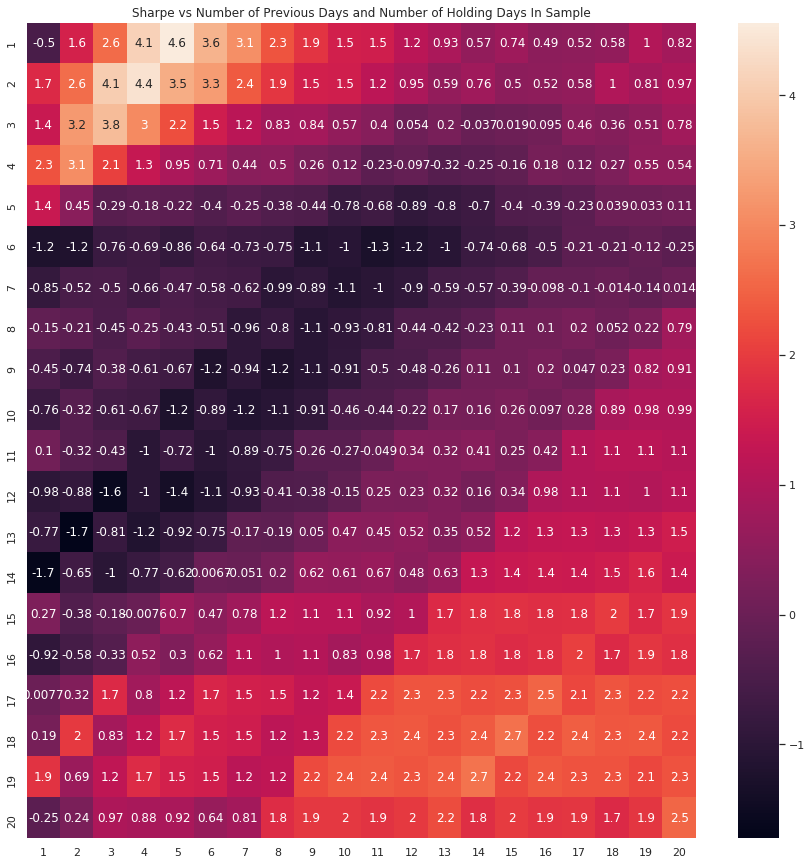

In [313]:
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 15))
ax.set_ylim(12, 10)

plt.title('Sharpe vs Number of Previous Days and Number of Holding Days In Sample')

sns.heatmap(data=mod_sharpes[1], annot=True, ax=ax, xticklabels=range(1, 21), yticklabels=range(1, 21))

## Cumulative Returns

In [0]:
def calc_cum_rtrns(previous_days, holding_days, df):
    pre_holiday_prices = []
    returns = []
    holiday_returns = []
    cum_rtrns = []
    for i in range(int(len(df)/2)):
        for j in range(len(holidays)):
            if dates[len(df) - i - 1] == holidays[j]:
                holiday_price = df.iloc[len(df) - i - holding_days - 1, 2]
                pre_holiday_price = df.iloc[len(df) - i + previous_days - 1, 2]
                profit = holiday_price - pre_holiday_price
                rtrn = (profit/pre_holiday_price)
                returns.append(rtrn)
                if cum_rtrns == []:
                    cum_rtrns.append(1 + rtrn)
                else:
                    cum_rtrns.append((1 + rtrn) * cum_rtrns[len(cum_rtrns) - 1])
                holiday_returns.append([dates[i], cum_rtrns[len(cum_rtrns) - 1]])
                
    return(cum_rtrns)

In [316]:
calc_cum_rtrns(1, 4, df1)

NameError: ignored